In [63]:
using ModelingToolkit, MethodOfLines, DomainSets, NonlinearSolve

@parameters x v
@variables u(..)
# Dxx = Differential(x)^2
# Dyy = Differential(y)^2

Dx = Differential(x)
Dv = Differential(v)


(::Differential) (generic function with 2 methods)

In [64]:
using Random, Distributions

In [65]:
using Plots

In [66]:
g = 1

1

In [67]:
P_v = Normal(1.2, 0.7)


Normal{Float64}(μ=1.2, σ=0.7)

In [71]:

eq = Dx(u(x, v))*v + Dv(u(x, v)*(1)) ~ 0

bcs = [u(0, v) ~ pdf(P_v, v)*10,
    u(x, 0.5) ~ 0,
#     Dx(u(2.0,v)) ~ 0,
    # u(x, 2) ~ 0,
    Dv(u(x,0.5)) ~ 0.0,
    
    # Dv(u(x,2)) ~ 0.0,
    
#     Dv(u(1, v)) ~ 0.0
]


# Space and time domains
domains = [x ∈ Interval(0.0, 1.5),
           v ∈ Interval(0.5, 2.0)]

@named pdesys = PDESystem([eq], bcs, domains, [x, v], [u(x, v)])

dx = 0.1
dv = 0.1


0.1

In [72]:

# Note that we pass in `nothing` for the time variable `t` here since we
# are creating a stationary problem without a dependence on time, only space.
discretization = MOLFiniteDifference([x => dx, v => dv], nothing, approx_order=4)

prob = discretize(pdesys, discretization)

NonlinearProblem with uType Vector{Float64}. In-place: true
u0: 28-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

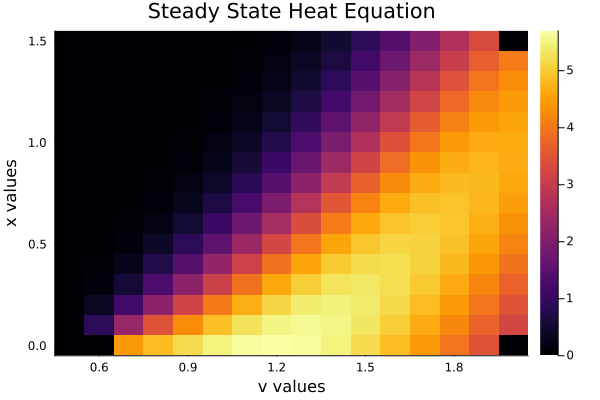

In [73]:

sol = NonlinearSolve.solve(prob, NewtonRaphson())


u_sol = sol[u(x, v)]



heatmap(sol[v], sol[x], u_sol, xlabel="v values", ylabel="x values",
        title="Steady State Heat Equation")

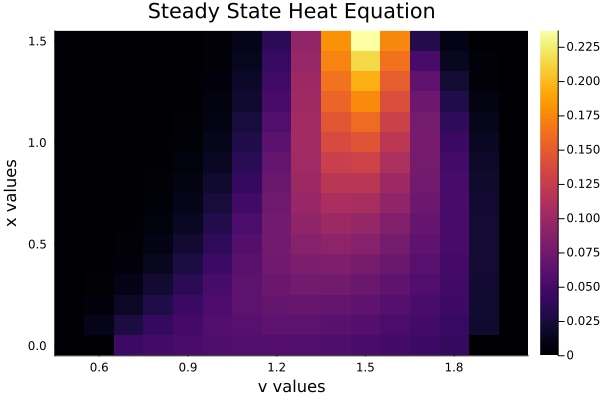

In [9]:
heatmap(sol[v], sol[x], u_sol*dx*dv, xlabel="v values", ylabel="x values",
        title="Steady State Heat Equation")

In [75]:
sum(u_sol[4, :] .*collect(LinRange(0.5, 2.5, length(u_sol[10, :]))))

96.09624778015545